In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
df = pd.read_csv("C:\\Users\\devof\\Desktop\\Projects\\Stress Predictor\\Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Exploratory Data Analysis(EDA)

In [4]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
df.drop_duplicates()
df.drop('Person ID', axis=1, inplace=True)

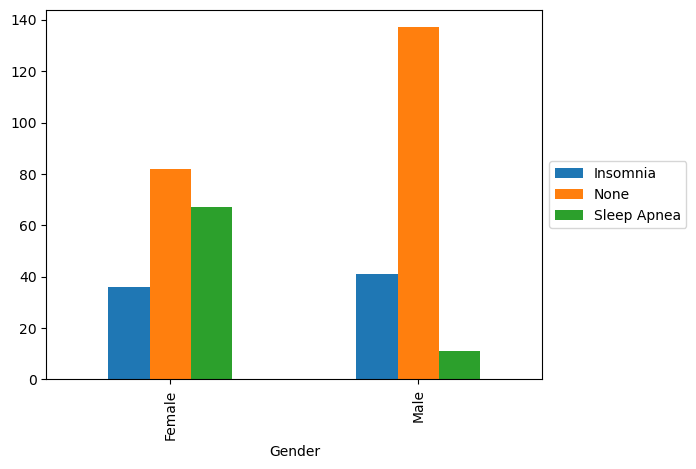

In [9]:
pd.crosstab(df['Gender'], df['Sleep Disorder']).plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

**Question :** Does Occupation has any effect on sleep cycle

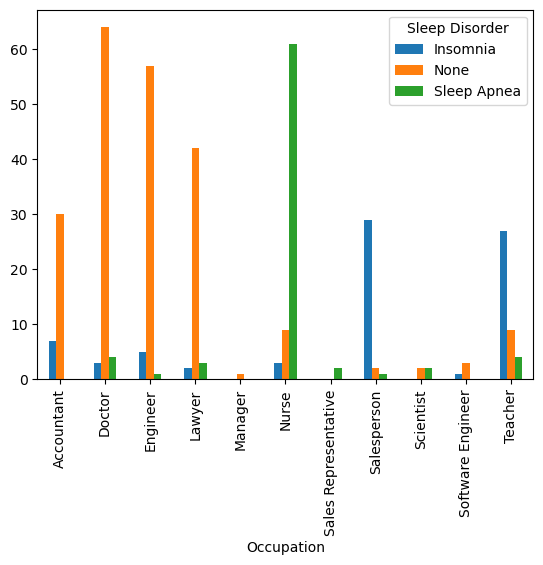

In [10]:
pd.crosstab(df['Occupation'], df['Sleep Disorder']).plot(kind='bar')
plt.show()

### Preprocessing of Data

In [11]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0:'BloodPressure_Upper', 1:'BloodPressure_Lower'})
df['BloodPressure_Upper'] = df['BloodPressure_Upper'].astype(float)
df['BloodPressure_Lower'] = df['BloodPressure_Lower'].astype(float)

In [12]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [13]:
from sklearn import preprocessing

In [15]:
def encode_label(df, columns):
    label_encoder = preprocessing.LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    
    return df

In [16]:
columns_to_encode = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


In [18]:
df = encode_label(df, columns_to_encode)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc


In [21]:
X = df.drop(['Stress Level'], axis=1)
y = df['Stress Level']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
rndf_clfr = RandomForestClassifier()
rndf_clfr.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [24]:
prediction = rndf_clfr.predict(X_test_scaled)

In [26]:
rf_d_report = classification_report(y_test, prediction)

# Plot classification reports
print("[ Random forest report ]\n")
print(rf_d_report)

[ Random forest report ]

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        14
           6       1.00      0.90      0.95        10
           7       0.75      1.00      0.86        12
           8       1.00      0.82      0.90        17

    accuracy                           0.95        75
   macro avg       0.96      0.95      0.95        75
weighted avg       0.96      0.95      0.95        75

